In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import numpy as np
import salem
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from netCDF4 import num2date

In [59]:
dtp = pd.to_datetime("1982-12-01_00:00:00", format="%Y-%m-%d_%H:%M:%S")

In [60]:
pd.Timestamp(dtp)

Timestamp('1982-12-01 00:00:00')

In [26]:
fchirps = '/media/ck/Elements/SouthAmerica/WRF/RAW_WRF/d02/wrfout_compact_d02_run1983.nc'

In [27]:
#del ds
ds = salem.open_wrf_dataset(fchirps, decode_times=False)

In [44]:
pd.to_datetime(ds.time[0].values)

Timestamp('1992-12-01 00:00:00')

In [46]:
new_time=[]
for t in ds.time:
   # ipdb.set_trace()
    ot = pd.to_datetime(t.values, format="%Y-%m-%d_%H:%M:%S")
    new_time.append(ot)

In [48]:
new_time

[Timestamp('1992-12-01 00:00:00'),
 Timestamp('1992-12-01 01:00:00'),
 Timestamp('1992-12-01 02:00:00'),
 Timestamp('1992-12-01 03:00:00'),
 Timestamp('1992-12-01 04:00:00'),
 Timestamp('1992-12-01 05:00:00'),
 Timestamp('1992-12-01 06:00:00'),
 Timestamp('1992-12-01 07:00:00'),
 Timestamp('1992-12-01 08:00:00'),
 Timestamp('1992-12-01 09:00:00'),
 Timestamp('1992-12-01 10:00:00'),
 Timestamp('1992-12-01 11:00:00'),
 Timestamp('1992-12-01 12:00:00'),
 Timestamp('1992-12-01 13:00:00'),
 Timestamp('1992-12-01 14:00:00'),
 Timestamp('1992-12-01 15:00:00'),
 Timestamp('1992-12-01 16:00:00'),
 Timestamp('1992-12-01 17:00:00'),
 Timestamp('1992-12-01 18:00:00'),
 Timestamp('1992-12-01 19:00:00'),
 Timestamp('1992-12-01 20:00:00'),
 Timestamp('1992-12-01 21:00:00'),
 Timestamp('1992-12-01 22:00:00'),
 Timestamp('1992-12-01 23:00:00'),
 Timestamp('1992-12-02 00:00:00'),
 Timestamp('1992-12-02 01:00:00'),
 Timestamp('1992-12-02 02:00:00'),
 Timestamp('1992-12-02 03:00:00'),
 Timestamp('1992-12-

In [50]:
ds_newt = ds.assign_coords({'time' : new_time})

In [51]:
ds_newt

<xarray.Dataset>
Dimensions:         (bottom_top: 34, soil_layers: 3, south_north: 93, time: 9553, west_east: 87)
Coordinates:
    xtime           (time) float32 7.23168e+17 7.231716e+17 ... 7.575552e+17
    lat             (south_north, west_east) float32 -10.824516 ... -7.4960403
    lon             (south_north, west_east) float32 -79.47869 ... -76.32662
  * time            (time) datetime64[ns] 1992-12-01 ... 1994-01-03
  * west_east       (west_east) float64 -1.72e+05 -1.68e+05 ... 1.72e+05
  * south_north     (south_north) float64 -1.188e+06 -1.184e+06 ... -8.204e+05
Dimensions without coordinates: bottom_top, soil_layers
Data variables:
    CF1             (time) float32 1.7617677 1.7617677 ... 1.7617677 1.7617677
    CF2             (time) float32 -1.0204656 -1.0204656 ... -1.0204656
    CF3             (time) float32 0.25869793 0.25869793 ... 0.25869793
    CFN             (time) float32 1.4677606 1.4677606 ... 1.4677606 1.4677606
    CFN1            (time) float32 -0.4677606 -0.4677606 ... -0.4677606
    ITIMESTEP       (time) int32 0 85 160 243 ... 886090 886184 886279 886386
    MAX_MSTFX       (time) float32 0.9994097 0.9994097 ... 0.9994097 0.9994097
    MAX_MSTFY       (time) float32 0.9994097 0.9994097 ... 0.9994097 0.9994097
    P00             (time) float32 100000.0 100000.0 ... 100000.0 100000.0
    P_STRAT         (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    P_TOP           (time) float32 5000.0 5000.0 5000.0 ... 5000.0 5000.0 5000.0
    T00             (time) float32 290.0 290.0 290.0 290.0 ... 290.0 290.0 290.0
    TISO            (time) float32 200.0 200.0 200.0 200.0 ... 200.0 200.0 200.0
    TLP             (time) float32 50.0 50.0 50.0 50.0 ... 50.0 50.0 50.0 50.0
    TLP_STRAT       (time) float32 -11.0 -11.0 -11.0 -11.0 ... -11.0 -11.0 -11.0
    ZETATOP         (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    DN              (time, bottom_top) float32 ...
    DNW             (time, bottom_top) float32 ...
    DZS             (time, soil_layers) float32 0.2 0.45000002 ... 0.8
    FNM             (time, bottom_top) float32 ...
    FNP             (time, bottom_top) float32 ...
    ZNU             (time, bottom_top) float32 ...
    ZNW             (time, bottom_top) float32 ...
    ZS              (time, soil_layers) float32 0.15 0.47500002 ... 1.1
    ACSNOM          (time, south_north, west_east) float32 ...
    ALBBCK          (time, south_north, west_east) float32 ...
    ALBEDO          (time, south_north, west_east) float32 ...
    ALBOLD          (time, south_north, west_east) float32 ...
    CANWAT          (time, south_north, west_east) float32 ...
    CH              (time, south_north, west_east) float32 ...
    CLAT            (time, south_north, west_east) float32 ...
    CM              (time, south_north, west_east) float32 ...
    COSALPHA        (time, south_north, west_east) float32 ...
    COSZEN          (time, south_north, west_east) float32 ...
    EDIR            (time, south_north, west_east) float32 ...
    EMISS           (time, south_north, west_east) float32 ...
    F               (time, south_north, west_east) float32 ...
    FIRA            (time, south_north, west_east) float32 ...
    FSA             (time, south_north, west_east) float32 ...
    FVEG            (time, south_north, west_east) float32 ...
    FWET            (time, south_north, west_east) float32 ...
    GHB             (time, south_north, west_east) float32 ...
    GHV             (time, south_north, west_east) float32 ...
    GLW             (time, south_north, west_east) float32 ...
    GRAIN           (time, south_north, west_east) float32 ...
    GRAUPELNC       (time, south_north, west_east) float32 ...
    GRDFLX          (time, south_north, west_east) float32 ...
    HAILNC          (time, south_north, west_east) float32 ...
    HFX             (time, south_north, west_east) float32 ...
    HGT             (time, south_north, west_east) float32 ...
    ISLTYP     

In [19]:
np.asarray(ds.time[1]-ds.time[0])#.astype('timedelta64[m]').astype(float)

array(3600000000000, dtype='timedelta64[ns]')

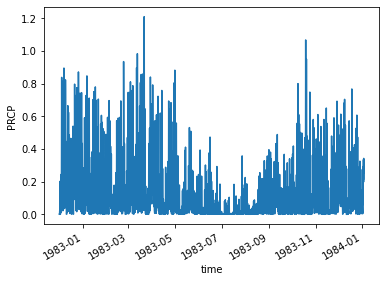

In [30]:
ds['PRCP'].mean(['south_north', 'west_east']).plot()

In [2]:
varlist = ['ALBEDO', 'LH',  'HFX', 'OLR', 'PBLH',
           'PSFC' , 'Q2','QFX','PRCP','SNOWC', 
           'LWDNB', 'SWDNB','SWUPB', 'LWUPB', 'T2C', 'TH2', 'TSK', 'U10', 'V10', 'RH2', 'col_int_QVAPOR', 'col_int_QICE']

#LANDMASK, SST, 'LU_INDEX',

static = ["LANDMASK", "LU_INDEX", "IVGTYP", "HGT"]

In [3]:
fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
sdf = salem.read_shapefile(fname)
sdf = salem.transform_geopandas(sdf, to_crs=salem.wgs84)

In [9]:
ds = ds[varlist] #.chunk({'time':365})

In [10]:
small = ds.salem.roi(shape=sdf)

In [73]:
csmall = small.rename({'south_north' : 'latitude', 'west_east' : 'longitude'})

In [74]:
csmall = csmall.assign_coords({'latitude' : new_lat, 'longitude' : new_lon})

In [77]:
csmall = csmall.assign_coords({'south_north' : south_north, 'west_east' : west_east})

In [78]:
csmall

<xarray.Dataset>
Dimensions:         (latitude: 93, longitude: 87, south_north: 93, time: 9553, west_east: 87)
Coordinates:
    xtime           (time) float32 4.075488e+17 4.0755244e+17 ... 4.41936e+17
    lat             (latitude, longitude) float32 -10.824516 ... -7.4960403
    lon             (latitude, longitude) float32 -79.47869 ... -76.32662
  * time            (time) datetime64[ns] 1982-12-01 ... 1984-01-03
  * longitude       (longitude) float32 -79.47869 -79.44204 ... -76.32662
  * latitude        (latitude) float32 -10.824516 -10.788528 ... -7.4960403
  * south_north     (south_north) float64 -1.188e+06 -1.184e+06 ... -8.204e+05
  * west_east       (west_east) float64 -1.72e+05 -1.68e+05 ... 1.72e+05
Data variables:
    ALBEDO          (time, latitude, longitude) float32 nan nan nan ... nan nan
    LANDMASK        (time, latitude, longitude) float32 nan nan nan ... nan nan
    LH              (time, latitude, longitude) float32 nan nan nan ... nan nan
    LU_INDEX        (time, latitude, longitude) float32 nan nan nan ... nan nan
    HFX             (time, latitude, longitude) float32 nan nan nan ... nan nan
    HGT             (time, latitude, longitude) float32 nan nan nan ... nan nan
    IVGTYP          (time, latitude, longitude) float64 nan nan nan ... nan nan
    LWDNB           (time, latitude, longitude) float32 nan nan nan ... nan nan
    LWUPB           (time, latitude, longitude) float32 nan nan nan ... nan nan
    MUB             (time, latitude, longitude) float32 nan nan nan ... nan nan
    OLR             (time, latitude, longitude) float32 nan nan nan ... nan nan
    PBLH            (time, latitude, longitude) float32 nan nan nan ... nan nan
    PSFC            (time, latitude, longitude) float32 nan nan nan ... nan nan
    Q2              (time, latitude, longitude) float32 nan nan nan ... nan nan
    Q2B             (time, latitude, longitude) float32 nan nan nan ... nan nan
    Q2V             (time, latitude, longitude) float32 nan nan nan ... nan nan
    QFX             (time, latitude, longitude) float32 nan nan nan ... nan nan
    QIN             (time, latitude, longitude) float32 nan nan nan ... nan nan
    QRFS            (time, latitude, longitude) float32 nan nan nan ... nan nan
    QSLAT           (time, latitude, longitude) float32 nan nan nan ... nan nan
    RAINNC          (time, latitude, longitude) float32 nan nan nan ... nan nan
    RAINSH          (time, latitude, longitude) float32 nan nan nan ... nan nan
    RUNSB           (time, latitude, longitude) float32 nan nan nan ... nan nan
    RUNSF           (time, latitude, longitude) float32 nan nan nan ... nan nan
    SFROFF          (time, latitude, longitude) float32 nan nan nan ... nan nan
    SMCWTD          (time, latitude, longitude) float32 nan nan nan ... nan nan
    SNOALB          (time, latitude, longitude) float32 nan nan nan ... nan nan
    SNOW            (time, latitude, longitude) float32 nan nan nan ... nan nan
    SNOWC           (time, latitude, longitude) float32 nan nan nan ... nan nan
    SST             (time, latitude, longitude) float32 nan nan nan ... nan nan
    SWDNB           (time, latitude, longitude) float32 nan nan nan ... nan nan
    SWNORM          (time, latitude, longitude) float32 nan nan nan ... nan nan
    SWUPB           (time, latitude, longitude) float32 nan nan nan ... nan nan
    T2              (time, latitude, longitude) float32 nan nan nan ... nan nan
    TH2             (time, latitude, longitude) float32 nan nan nan ... nan nan
    TR              (time, latitude, longitude) float32 nan nan nan ... nan nan
    TSK             (time, latitude, longitude) float32 nan nan nan ... nan nan
    U10             (time, latitude, longitude) float32 nan nan nan ... nan nan
    UDROFF          (time, latitude, longitude) float32 nan nan nan ... nan nan
    V10             (time, latitude, longitude) float32 nan nan nan ... nan nan
    VEGFRA          (time, latitude, longitude) float32 nan na

In [54]:
new_lat = small['lat'].data[:,0]
new_lon = small['lon'].data[0,:]

In [58]:
small

<xarray.Dataset>
Dimensions:         (latitude: 93, longitude: 87, south_north: 93, time: 9553, west_east: 87)
Coordinates:
    xtime           (time) float32 4.075488e+17 4.0755244e+17 ... 4.41936e+17
    lat             (south_north, west_east) float32 -10.824516 ... -7.4960403
    lon             (south_north, west_east) float32 -79.47869 ... -76.32662
  * time            (time) datetime64[ns] 1982-12-01 ... 1984-01-03
  * west_east       (west_east) float64 -1.72e+05 -1.68e+05 ... 1.72e+05
  * south_north     (south_north) float64 -1.188e+06 -1.184e+06 ... -8.204e+05
  * latitude        (latitude) float32 -10.824516 -10.788528 ... -7.4960403
  * longitude       (longitude) float32 -79.47869 -79.44204 ... -76.32662
Data variables:
    ALBEDO          (time, south_north, west_east) float32 nan nan ... nan nan
    LANDMASK        (time, south_north, west_east) float32 nan nan ... nan nan
    LH              (time, south_north, west_east) float32 nan nan ... nan nan
    LU_INDEX        (time, south_north, west_east) float32 nan nan ... nan nan
    HFX             (time, south_north, west_east) float32 nan nan ... nan nan
    HGT             (time, south_north, west_east) float32 nan nan ... nan nan
    IVGTYP          (time, south_north, west_east) float64 nan nan ... nan nan
    LWDNB           (time, south_north, west_east) float32 nan nan ... nan nan
    LWUPB           (time, south_north, west_east) float32 nan nan ... nan nan
    MUB             (time, south_north, west_east) float32 nan nan ... nan nan
    OLR             (time, south_north, west_east) float32 nan nan ... nan nan
    PBLH            (time, south_north, west_east) float32 nan nan ... nan nan
    PSFC            (time, south_north, west_east) float32 nan nan ... nan nan
    Q2              (time, south_north, west_east) float32 nan nan ... nan nan
    Q2B             (time, south_north, west_east) float32 nan nan ... nan nan
    Q2V             (time, south_north, west_east) float32 nan nan ... nan nan
    QFX             (time, south_north, west_east) float32 nan nan ... nan nan
    QIN             (time, south_north, west_east) float32 nan nan ... nan nan
    QRFS            (time, south_north, west_east) float32 nan nan ... nan nan
    QSLAT           (time, south_north, west_east) float32 nan nan ... nan nan
    RAINNC          (time, south_north, west_east) float32 nan nan ... nan nan
    RAINSH          (time, south_north, west_east) float32 nan nan ... nan nan
    RUNSB           (time, south_north, west_east) float32 nan nan ... nan nan
    RUNSF           (time, south_north, west_east) float32 nan nan ... nan nan
    SFROFF          (time, south_north, west_east) float32 nan nan ... nan nan
    SMCWTD          (time, south_north, west_east) float32 nan nan ... nan nan
    SNOALB          (time, south_north, west_east) float32 nan nan ... nan nan
    SNOW            (time, south_north, west_east) float32 nan nan ... nan nan
    SNOWC           (time, south_north, west_east) float32 nan nan ... nan nan
    SST             (time, south_north, west_east) float32 nan nan ... nan nan
    SWDNB           (time, south_north, west_east) float32 nan nan ... nan nan
    SWNORM          (time, south_north, west_east) float32 nan nan ... nan nan
    SWUPB           (time, south_north, west_east) float32 nan nan ... nan nan
    T2              (time, south_north, west_east) float32 nan nan ... nan nan
    TH2             (time, south_north, west_east) float32 nan nan ... nan nan
    TR              (time, south_north, west_east) float32 nan nan ... nan nan
    TSK             (time, south_north, west_east) float32 nan nan ... nan nan
    U10             (time, south_north, west_east) float32 nan nan ... nan nan
    UDROFF          (time, south_north, west_east) float32 nan nan ... nan nan
    V10             (time, south_north, west_east) float32 nan nan ... nan nan
    VEGFRA          (time, south_north, west_east) float32 nan nan ... nan nan
    WA           

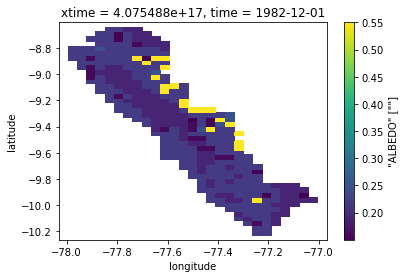

In [99]:
csmall['ALBEDO'].isel(time=0).sel(latitude=slice(-10.25,-8.6), longitude=slice(-78.02, -76.98)).plot()

In [100]:
del csmall

In [101]:
del ds

In [36]:
import glob
import ipdb
import os

fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
sdf = salem.read_shapefile(fname)
sdf = salem.transform_geopandas(sdf, to_crs=salem.wgs84)

ds_list = []
for f in glob.glob('/media/ck/Elements/SouthAmerica/WRF/RAW_WRF/d02/*.nc')[0:1]:
    print('Doing', f)
    fbase = os.path.basename(f)
    ds = salem.open_wrf_dataset(f, decode_times=False)
    ds = ds[varlist]
    new_lat = ds['lat'].data[:,0]
    new_lon = ds['lon'].data[0,:]
    south_north = ds['south_north']
    west_east = ds['west_east']
    
    ds = ds.rename({'south_north' : 'latitude', 'west_east' : 'longitude'})
    ds = ds.assign_coords({'latitude' : new_lat, 'longitude' : new_lon})
    ds = ds.assign_coords({'south_north' : ('latitude', south_north),'west_east' : ('longitude',west_east)})
    
    ds = ds.sel(latitude=slice(-10.25,-8.6), longitude=slice(-78.02, -76.98))
    #ipdb.set_trace()
    dsout = ds.salem.roi(shape=sdf)
#     new_time=[]
#     for t in dsout.time:
#         ipdb.set_trace()
#         ot = pd.to_datetime(t.values, format="%Y-%m-%d_%H:%M:%S")
#         new_time.append(ot)
#     dsout = dsout.assign_coords({'time' : new_time})
    dsout = dsout.drop('xtime')
    #dsout = dsout.assign_coords({'time' : ttime.values})
    comp = dict(zlib=True, complevel=5)
    encoding = {var: comp for var in dsout.data_vars}
    
    dsout.to_netcdf('/media/ck/Elements/SouthAmerica/WRF/rio_santa/'+fbase, mode='w', encoding=encoding, format='NETCDF4')
    #ds_list.append(dsout)
    del ds

Doing /media/ck/Elements/SouthAmerica/WRF/RAW_WRF/d02/wrfout_compact_d02_run1993.nc


In [21]:
xr.concat(ds_list, dim='time').to_netcdf('/media/ck/Elements/SouthAmerica/WRF/RAW_WRF/test.nc')

In [22]:
ds_list[0].time

<xarray.DataArray 'time' (time: 9553)>
array(['1992-12-01T00:00:00.000000000', '1992-12-01T01:00:00.000000000',
       '1992-12-01T02:00:00.000000000', ..., '1994-01-02T22:00:00.000000000',
       '1994-01-02T23:00:00.000000000', '1994-01-03T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1992-12-01 1992-12-01T01:00:00 ... 1994-01-03

In [25]:
test = xr.open_dataset('/media/ck/Elements/SouthAmerica/WRF/RAW_WRF/test.nc')

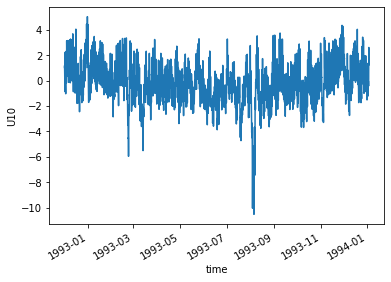

In [34]:
(test['U10'].mean(['latitude', 'longitude'])).plot()